# Text Analysis on  Block Chain - Mini Project

In [1]:
"""
Objective : To analyze the abstract column of the Dataset and perform topic modelling using LDA and NMF techniques.
Also,to preprocess and lemmatize text.  Find latent topics in the corpus and evaluate the model for the right number of topics.
Finally to plot the top 100 words frequency plot.
"""

# General Libraries
import pandas as pd
import numpy as np
# For Pre-Processing of the data
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# For creating a word cloud
from wordcloud import WordCloud
# Topic modelling-LDA
from gensim import models
import gensim
from gensim.models import CoherenceModel
# Topic modelling-NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
# Foe visualization
import matplotlib.pyplot as plt
% matplotlib inline


C:\Anaconda\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
"""
Read the data into a dataframe called 'df
"""
df = pd.read_excel("blockchain_data.xlsx")
df.head()

PT                                                 AU  BA          BE   GP  \
0  J                    Muzammal, M; Qu, Q; Nasrulin, B NaN         NaN  NaN   
1  S               Almeida, S; Albuquerque, A; Silva, A NaN  Silhavy, R  NaN   
2  J         da Silva, AC; Maganini, ND; de Almeida, EF NaN         NaN  NaN   
3  J  Sahoo, KS; Puthal, D; Tiwary, M; Rodrigues, JJ... NaN         NaN  NaN   
4  J                 Ma, ZF; Jiang, M; Gao, HM; Wang, Z NaN         NaN  NaN   

                                                  AF  BF  CA  \
0     Muzammal, Muhammad; Qu, Qiang; Nasrulin, Bulat NaN NaN   
1  Almeida, Samantha; Albuquerque, Adriano; Silva... NaN NaN   
2  da Silva Filho, Antonio Carlos; Maganini, Nata... NaN NaN   
3  Sahoo, Kshira Sagar; Puthal, Deepak; Tiwary, M... NaN NaN   
4  Ma, Zhaofeng; Jiang, Ming; Gao, Hongmin; Wang,... NaN NaN   

                                                  TI  \
0  Renovating blockchain with distributed databas...   
1  An Approach to Develop Software that Uses Bloc...   
2            Multifractal analysis of Bitcoin market   
3  An early detection of low rate DDoS attack to ...   
4           Blockchain for digital rights management   

                                                  SO ...  PG  WC  SC  GA  \
0  FUTURE GENERATION COMPUTER SYSTEMS-THE INTERNA... ... NaN NaN NaN NaN   
1  SOFTWARE ENGINEERING AND ALGORITHMS IN INTELLI... ... NaN NaN NaN NaN   
2  PHYSICA A-STATISTICAL MECHANICS AND ITS APPLIC... ... NaN NaN NaN NaN   
3  FUTURE GENERATION COMPUTER SYSTEMS-THE INTERNA... ... NaN NaN NaN NaN   
4  FUTURE GENERATION COMPUTER SYSTEMS-THE INTERNA... ... NaN NaN NaN NaN   

                    UT  PM  OA  HC  HP  DA  
0  WOS:000446283600009 NaN NaN NaN NaN NaN  
1  WOS:000445094400036 NaN NaN NaN NaN NaN  
2  WOS:000446151000081 NaN NaN NaN NaN NaN  
3  WOS:000444360500054 NaN NaN NaN NaN NaN  
4  WOS:000444360500059 NaN NaN NaN NaN NaN  

[5 rows x 68 columns]

# Pre-processing of Data

In [3]:
"""
Extracted the Abstract, Title and Keywordcolumns from df dataframe , created a new dataframe called "Abs_df" and transposed it
"""
Abstract,Title,Keywords = df.AB,df.TI,df.DE
new_df = pd.DataFrame(data =[Title,Keywords,Abstract])
Abs_df = new_df.T
Abs_df.rename(columns={'TI':'Title','DE':'Keywords','AB':'Abstract'},inplace= True)
Abs_df.shape

(941, 3)

In [4]:
"""
To check if there are any null values in the dataframe 
"""
Abs_df.loc[Abs_df.Abstract.isnull()]# to get the null values in Abstract column

Title Keywords Abstract
6  IMAGINING THE BLOCKCHAIN ECONOMY      NaN      NaN

In [5]:
"""
To Drop the null values found
"""
Abs_df.drop(Abs_df.index[6:7],inplace=True)

## Remove Punctuation from the text

In [6]:

"""
Function removepunc created to remove punctuation and stopwords from the text.
It takes one argument x; string 

"""

def removepunc_stopwords(x):
    p = string.punctuation
    d= string.digits
    combined = p+d
    table = str.maketrans(combined, len(combined) * " ")
    x = x.translate(table)
    x= x.lower()
    y= x.split()
    for i in y:
        if i in stopwords.words('english'):
            y.remove(i)
    return y
    

In [7]:

"""
Applied the removepunc_stopwords function on the Abstract column of the dataframe and appended the output into the new list
"""
no_stopwords_punc=[]
for i in Abs_df.Abstract:
    a = removepunc_stopwords(str(i))
    no_stopwords_punc.append(a)
print((no_stopwords_punc))

[['blockchain', 'decentralised', 'linked', 'data', 'structure', 'characterised', 'its', 'inherent', 'resistance', 'data', 'modification', 'it', 'deficient', 'search', 'queries', 'primarily', 'due', 'its', 'inferior', 'data', 'formatting', 'distributed', 'database', 'also', 'decentralised', 'data', 'structure', 'features', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'formatting', 'suffers', 'data', 'reliability', 'this', 'work', 'showcase', 'chainsql', 'open', 'source', 'system', 'developed', 'integrating', 'blockchain', 'database', 'e', 'present', 'blockchain', 'database', 'application', 'platform', 'has', 'decentralised', 'distributed', 'audibility', 'features', 'blockchain', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'structure', 'the', 'distributed', 'databases', 'chainsql', 'features', 'tamper', 'resistant', 'consistent', 'multi', 'active', 'database', 'reliable', 'cost', 'effective', 'data', 'level', 'disaster', 'recovery', 'backup', 'an', 'auditab

In [89]:
junk_lst =['the','a','as','be','by','c','is','non','use','be','this','also','e','an','it','b','its','to','may','make','in','their','can','other','our','however','have','mine','not']
for i in no_stopwords_punc:
    for j in i:
        if j in junk_lst:
            i.remove(j)
print(no_stopwords_punc)


[['blockchain', 'decentralised', 'linked', 'data', 'structure', 'characterised', 'inherent', 'resistance', 'data', 'modification', 'deficient', 'search', 'queries', 'primarily', 'due', 'inferior', 'data', 'formatting', 'distributed', 'database', 'decentralised', 'data', 'structure', 'features', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'formatting', 'suffers', 'data', 'reliability', 'work', 'showcase', 'chainsql', 'open', 'source', 'system', 'developed', 'integrating', 'blockchain', 'database', 'present', 'blockchain', 'database', 'application', 'platform', 'has', 'decentralised', 'distributed', 'audibility', 'features', 'blockchain', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'structure', 'distributed', 'databases', 'chainsql', 'features', 'tamper', 'resistant', 'consistent', 'multi', 'active', 'database', 'reliable', 'cost', 'effective', 'data', 'level', 'disaster', 'recovery', 'backup', 'auditable', 'transaction', 'log', 'mechanism', 'system', 'pre

## Bigram and Trigram

In [90]:
bigram = gensim.models.Phrases(no_stopwords_punc,threshold=200)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(text):
    return[bigram_mod[doc] for doc in text]

data_words_bigrams = make_bigrams(no_stopwords_punc)

In [91]:
trigram = gensim.models.Phrases(bigram[no_stopwords_punc], threshold=200)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_trigram(text):
    return[trigram_mod[doc] for doc in text]

data_words_trigram = make_trigram(data_words_bigrams)


C:\Anaconda\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


# Lemmatization

In [8]:
lematizer = WordNetLemmatizer()

In [9]:
"""
Lemmatization func
"""

def lem(x):
    y = []
    for i in x:
        y.append(lematizer.lemmatize(i,pos='n'))
    return y
    

In [10]:
"""
Applied lem function on the Abstract column of the Dataframe
"""
lem_Abstract = []
for i in no_stopwords_punc:
    lem_Abstract.append(lem(i))
print((lem_Abstract))



[['blockchain', 'decentralised', 'linked', 'data', 'structure', 'characterised', 'it', 'inherent', 'resistance', 'data', 'modification', 'it', 'deficient', 'search', 'query', 'primarily', 'due', 'it', 'inferior', 'data', 'formatting', 'distributed', 'database', 'also', 'decentralised', 'data', 'structure', 'feature', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'formatting', 'suffers', 'data', 'reliability', 'this', 'work', 'showcase', 'chainsql', 'open', 'source', 'system', 'developed', 'integrating', 'blockchain', 'database', 'e', 'present', 'blockchain', 'database', 'application', 'platform', 'ha', 'decentralised', 'distributed', 'audibility', 'feature', 'blockchain', 'quick', 'query', 'processing', 'well', 'designed', 'data', 'structure', 'the', 'distributed', 'database', 'chainsql', 'feature', 'tamper', 'resistant', 'consistent', 'multi', 'active', 'database', 'reliable', 'cost', 'effective', 'data', 'level', 'disaster', 'recovery', 'backup', 'an', 'auditable', 'tra

In [11]:

"""
Removed the Abstract columc and replaced it with the lemmatized version of the text
"""
Abs_df.drop('Abstract',axis = 1, inplace= True)
Abs_df.insert(loc=2,column= 'Lem_Abstract',value= lem_Abstract)

Abs_df.head()

Title  \
0  Renovating blockchain with distributed databas...   
1  An Approach to Develop Software that Uses Bloc...   
2            Multifractal analysis of Bitcoin market   
3  An early detection of low rate DDoS attack to ...   
4           Blockchain for digital rights management   

                                            Keywords  \
0  Blockchain; Distributed databases; Blockchain ...   
1  Software development; Process; Blockchain; Sta...   
2                                                NaN   
3  SDN; Controller; DDoS attack; Information dist...   
4  Digital rights management; Blockchain; Content...   

                                        Lem_Abstract  
0  [blockchain, decentralised, linked, data, stru...  
1  [nowadays, blockchain, technology, great, mark...  
2  [recent, emergence, use, growth, cryptocurrenc...  
3  [primary, innovation, behind, software, define...  
4  [online, digital, content, service, becomes, e...

## Word Cloud

In [12]:
"""
Converted the Lem_abstract column into a string to create a word cloud of the text
"""

text = ""
for i in lem_Abstract:
    for j in i :
        text+=" " +j
text

' blockchain decentralised linked data structure characterised it inherent resistance data modification it deficient search query primarily due it inferior data formatting distributed database also decentralised data structure feature quick query processing well designed data formatting suffers data reliability this work showcase chainsql open source system developed integrating blockchain database e present blockchain database application platform ha decentralised distributed audibility feature blockchain quick query processing well designed data structure the distributed database chainsql feature tamper resistant consistent multi active database reliable cost effective data level disaster recovery backup an auditable transaction log mechanism the system presented an operational multi active database along the data level disaster recovery backup audibility feature a comprehensive experimental evaluation is performed demonstrate the effectiveness the system c elsevier b v right reserve

In [13]:
wordcloud = WordCloud().generate(text)

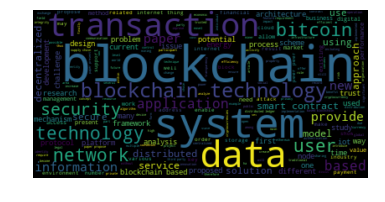

In [14]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Modelling - LDA

In [15]:
"""
Created the gensim dictionary
"""
dictionary = gensim.corpora.Dictionary(Abs_df.Lem_Abstract)

In [16]:
count = 0 
for k,v in dictionary.iteritems():
    print(k,v)
    count+= 1
    if count > 10:
        break

0 a
1 active
2 along
3 also
4 an
5 application
6 audibility
7 auditable
8 b
9 backup
10 blockchain


In [17]:
dictionary.filter_extremes()

In [18]:
""" 
Created Gensim Corpus
"""
bow_corpus = [dictionary.doc2bow(doc) for doc in Abs_df.Lem_Abstract]

In [19]:
tfidf = models.TfidfModel(bow_corpus)

In [20]:
corpus_tfidf = tfidf[bow_corpus]


In [21]:
"""
Modelling using LDA to get the topics
"""
lda_model = gensim.models.LdaMulticore(corpus_tfidf,num_topics=25,id2word=dictionary)

In [22]:
for i, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {} \n'.format(i, topic))
    

Topic: 0 Word: 0.004*"data" + 0.003*"channel" + 0.003*"reputation" + 0.003*"network" + 0.003*"architecture" + 0.003*"p" + 0.003*"server" + 0.003*"puzzle" + 0.003*"model" + 0.003*"protocol" 

Topic: 1 Word: 0.003*"cloud" + 0.003*"manufacturing" + 0.003*"node" + 0.003*"management" + 0.003*"service" + 0.003*"supply" + 0.003*"application" + 0.003*"bitcoin" + 0.003*"software" + 0.003*"future" 

Topic: 2 Word: 0.005*"data" + 0.004*"iot" + 0.003*"network" + 0.003*"user" + 0.003*"storage" + 0.003*"bitcoin" + 0.003*"payment" + 0.003*"service" + 0.003*"centralized" + 0.003*"smart" 

Topic: 3 Word: 0.004*"user" + 0.004*"p" + 0.003*"iot" + 0.003*"privacy" + 0.003*"storage" + 0.003*"algorithm" + 0.003*"network" + 0.003*"device" + 0.003*"access" + 0.003*"bitcoin" 

Topic: 4 Word: 0.005*"data" + 0.003*"information" + 0.003*"bitcoin" + 0.003*"transaction" + 0.003*"scheme" + 0.003*"device" + 0.003*"network" + 0.003*"work" + 0.003*"energy" + 0.003*"signature" 

Topic: 5 Word: 0.005*"energy" + 0.004*"eco

In [23]:
"""
Compute perplexity; the lower the better the model is. Perplexity defines how precisely the model can identify topics
"""

lda_model.log_perplexity(corpus_tfidf)

-14.160617286211467

In [24]:
coherence_model_lda = CoherenceModel(model= lda_model, texts= Abs_df.Lem_Abstract,dictionary=dictionary )

In [25]:
coherence_lda = coherence_model_lda.get_coherence()


In [26]:
print(coherence_lda)

0.2818635898950434


# Topic Modelling - NMF

In [27]:
vectorizer = TfidfVectorizer()

In [28]:
word_text = text.split()


In [29]:
dtm = vectorizer.fit_transform(word_text)

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [30]:
vocab = vectorizer.get_feature_names()

In [31]:
clf = decomposition.NMF(n_components=25,random_state=1)

In [32]:
topic = clf.fit_transform(dtm)

In [33]:
topic_words = []
for topic in clf.components_:
    word = np.argsort(topic)[::-1][0:20]
    topic_words.append([vocab[i] for i in word])

In [34]:
for i in range (len(topic_words)):
    print("Topic {}: {} \n".format(i,' '.join(topic_words[i])))

Topic 0: the zurich every evaluates evaluating evaluation evaluative evaluator evasion evce even event eventual eventually ever everchanging everybody evaluate everyday everyone 

Topic 1: blockchain zurich every evaluating evaluation evaluative evaluator evasion evce even event eventual eventually ever everchanging everybody evaluated everyday everyone everything 

Topic 2: technology proposed digital using privacy internet management peer protocol present scheme used development currency propose problem process access block storage 

Topic 3: system to decentralized privacy using peer research cloud however ledger present approach result issue secure business mechanism provide device challenge 

Topic 4: data decentralized privacy using internet solution management peer protocol research cloud however present ledger result approach development currency issue secure 

Topic 5: based an proposed also time peer ledger approach result scheme used issue are secure business problem work pr

# Plot for top 100 words

In [35]:
freq = nltk.FreqDist(word_text)

In [36]:
most_freq_words = freq.most_common(n= 100)

In [37]:
Value = [i[1] for i in most_freq_words]
word = [i[0] for i in most_freq_words]


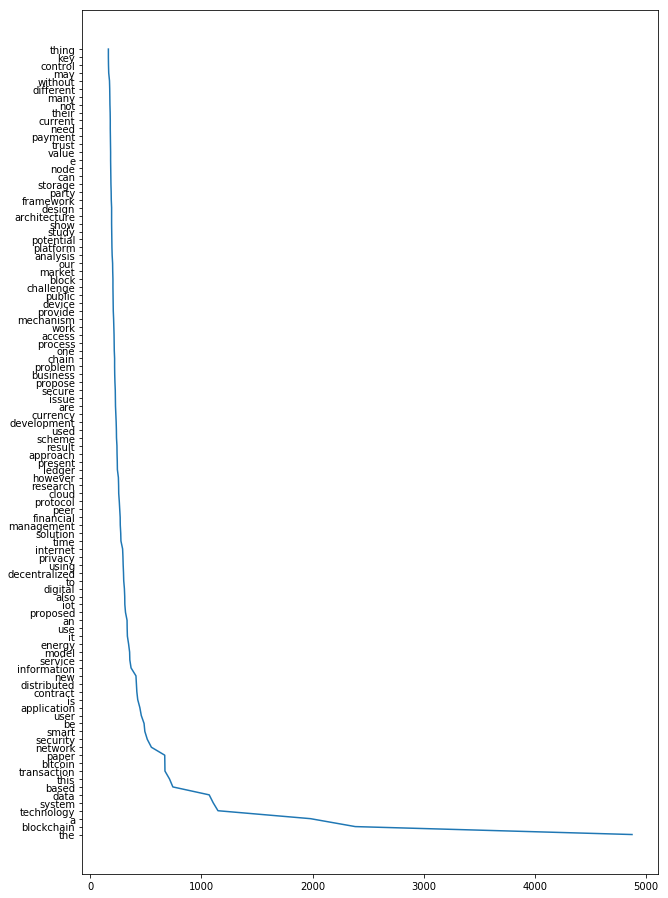

In [38]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_axes([0,0,1,1])
ax.plot(Value,word)

# Evaluation of model- right number of topics

In [39]:
"""
Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
   
"""
def compute_coherence_values(dictionary, corpus,texts,limit= 25,start = 2, steps=3):
    coherence_values =[]
    model_list = []
    for i in range(start, limit,steps):
        model = gensim.models.LdaMulticore(corpus = corpus,num_topics=25,id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model= model, texts= texts,dictionary = dictionary)
        coherence_values.append(coherence_model.get_coherence())
    return(model_list,coherence_values)

In [40]:
model_list, coherence_values = compute_coherence_values(dictionary, corpus_tfidf,Abs_df.Lem_Abstract)

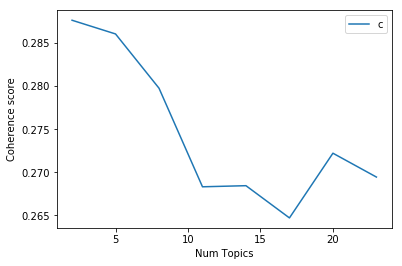

In [41]:
start = 2
limit =25
steps = 3
x = range(start, limit, steps)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Conclusion: 
* From the graph above we can infer that the model perform best when number of topic are 2 with coherence value greater than 0.30
